#### 2 EDA/Feature engineerig 

#### 2.1 Missing and/or extreme values 

In [72]:
import pandas as pd

# Load the data
data_df2 = pd.read_pickle('../data/parsed_data_all_positions.pkl')

In [73]:
data_df2.head()

,Rank,Name,Age,Exp,G,Cmp,Att,Cm%,PYd,Y/Att,...,FantPt,Position,Year,Week,Scoring profile,Y/Rsh,Rec,RecYd,RecTD,Y/Rec
0,1,Josh Allen BUF,24.0,3.0,1,33,46,71.7,312,6.78,...,32.2,1,qb,2020,p,NaN,NaN,NaN,NaN,NaN
1,2,Russell Wilson SEA,32.0,9.0,1,31,35,88.6,322,9.20,...,31.8,1,qb,2020,p,NaN,NaN,NaN,NaN,NaN
2,3,Aaron Rodgers GB,37.0,16.0,1,32,44,72.7,364,8.27,...,30.8,1,qb,2020,p,NaN,NaN,NaN,NaN,NaN
3,4,Lamar Jackson BAL,23.0,3.0,1,20,25,80.0,275,11.00,...,27.5,1,qb,2020,p,NaN,NaN,NaN,NaN,NaN
4,5,Kyler Murray ARI,23.0,2.0,1,26,40,65.0,230,5.75,...,26.3,1,qb,2020,p,NaN,NaN,NaN,NaN,NaN


Missing values per column:
Rank                   0
Name                   0
Age                    0
Exp                    0
G                      0
Cmp                23660
Att                23660
Cm%                23660
PYd                23660
Y/Att              23660
PTD                23660
Int                23660
Rsh                 6483
RshYd               6483
RshTD               6483
FP/G                   0
FantPt                 0
Position               0
Year                   0
Week                   0
Scoring profile        0
Y/Rsh              19628
Rec                 2664
RecYd               2664
RecTD               2664
Y/Rec               9360
dtype: int64


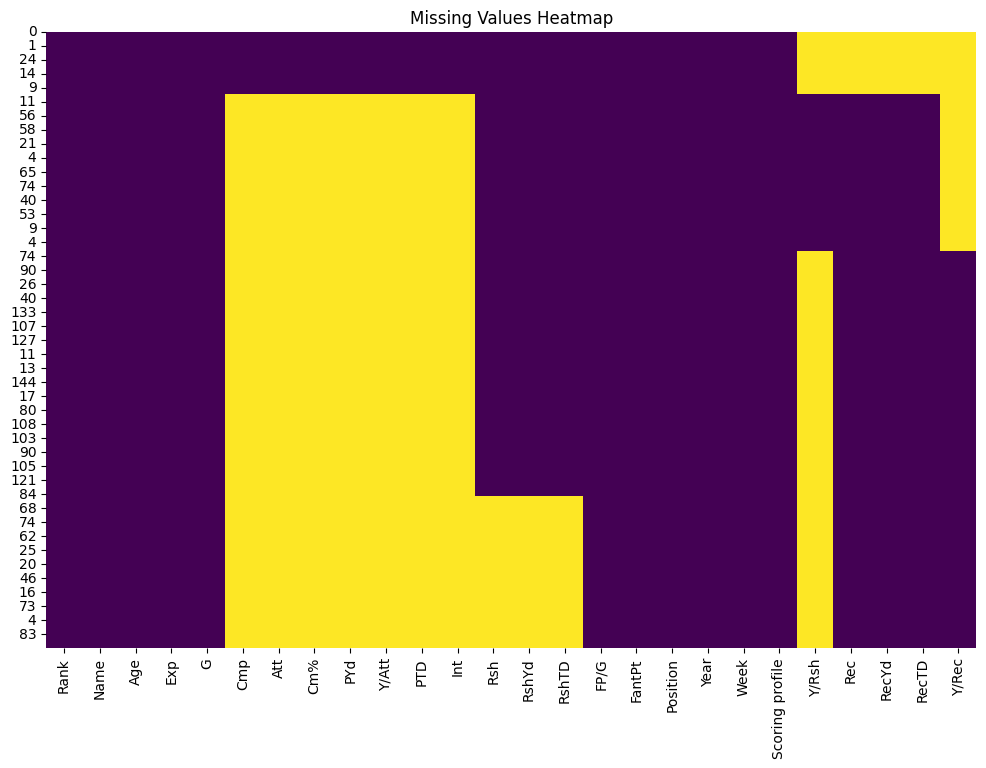

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the pickle file
data_df = pd.read_pickle('/workspaces/maria272727fantasy_sports_assistant/data/parsed_data_all_positions.pkl')

# Check for missing values in the dataset
missing_values = data_df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Visualize missing values with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [75]:
import pandas as pd

# Load the data
data_df2 = pd.read_pickle('../data/parsed_data_all_positions.pkl')

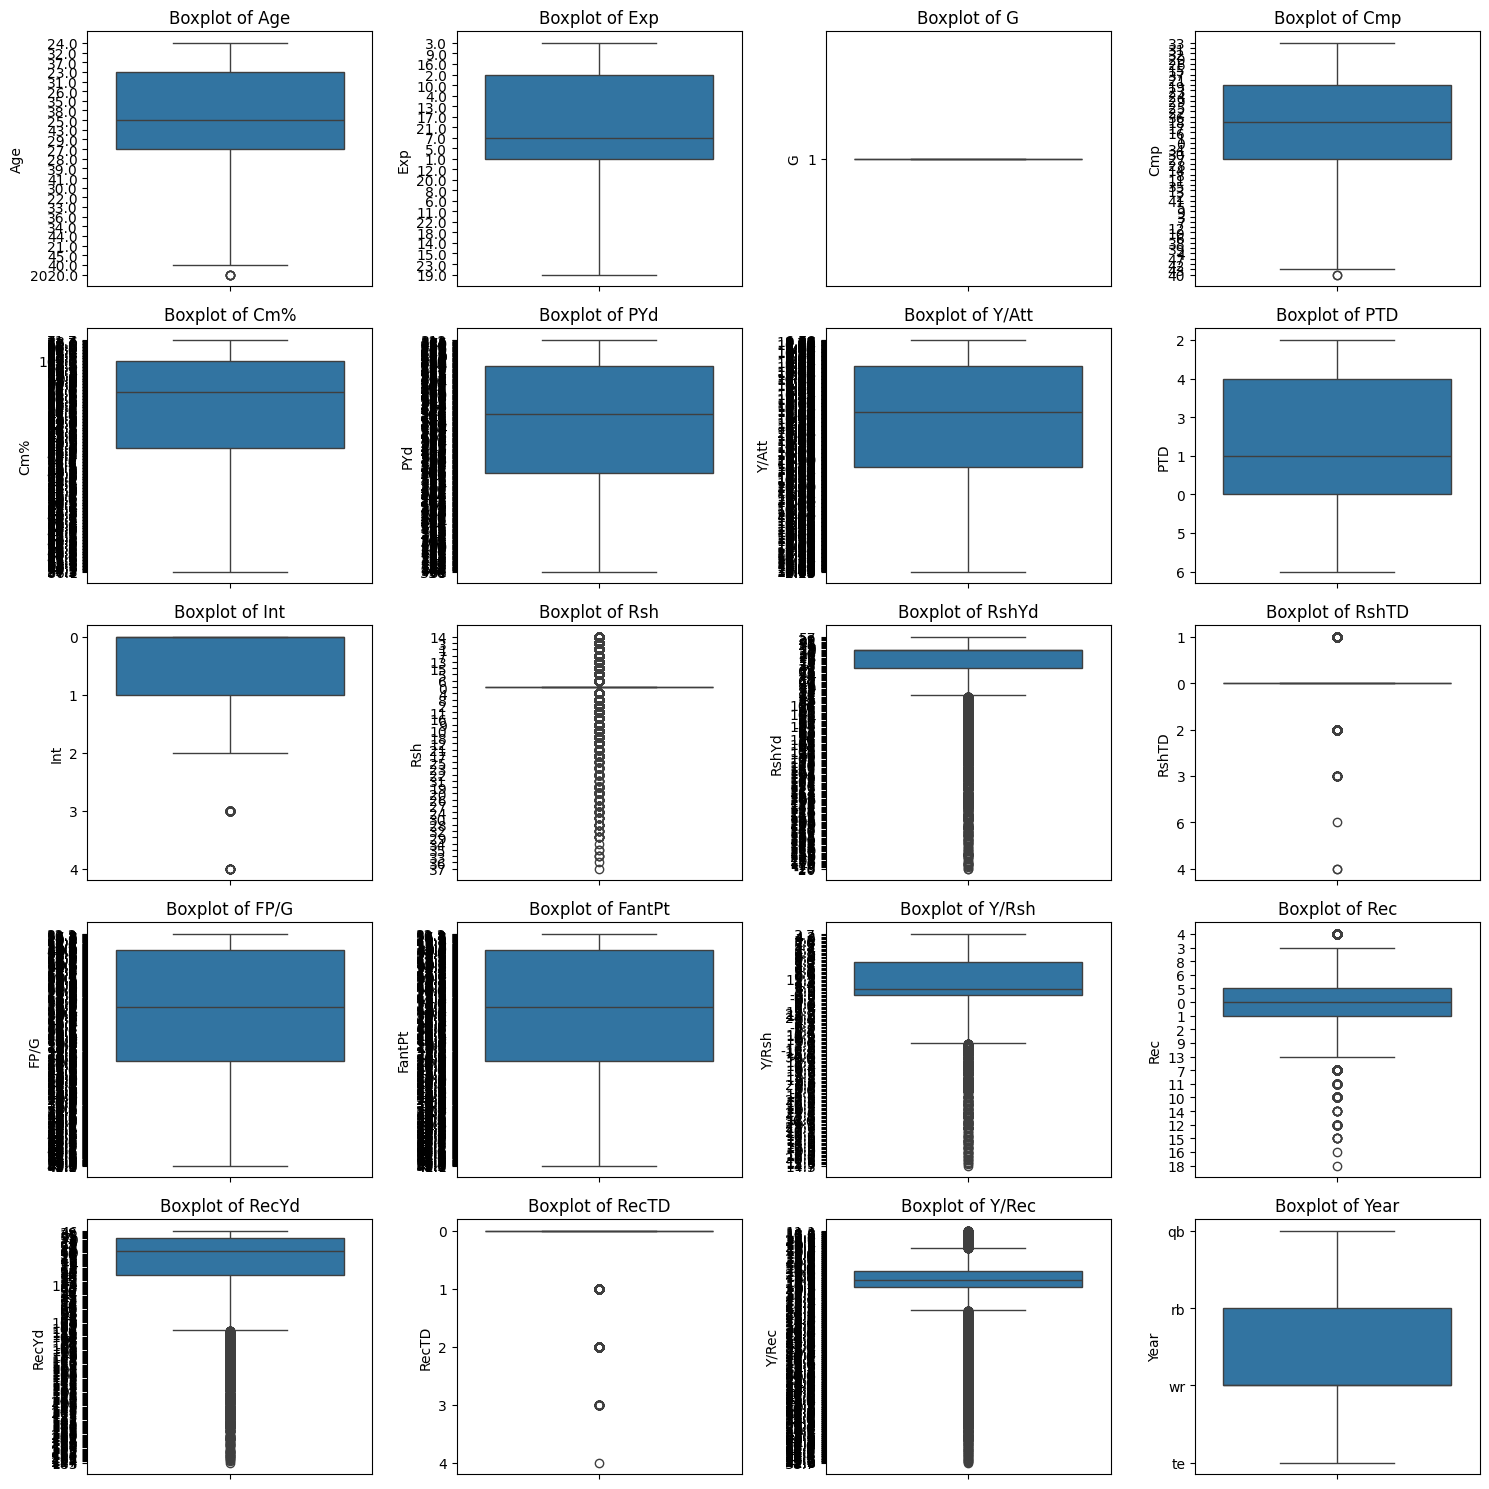

In [76]:
# Visualizing outliers for some important numeric columns
import seaborn as sns
import matplotlib.pyplot as plt

# List of numeric columns you want to check
numeric_columns = [
    'Age', 'Exp', 'G', 'Cmp', 'Cm%', 'PYd', 'Y/Att', 'PTD', 'Int', 
    'Rsh', 'RshYd', 'RshTD', 'FP/G', 'FantPt', 'Y/Rsh', 'Rec', 'RecYd', 
    'RecTD', 'Y/Rec', 'Year'
]

# Set up the number of rows and columns dynamically to handle more than 20 subplots
num_columns = 4  # You can adjust this number as per your need
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns  # Ensures enough rows for all plots

plt.figure(figsize=(15, num_rows * 3))  # Adjusting figure size based on number of rows
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.boxplot(data_df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [77]:
# Check for missing columns
missing_columns = [col for col in numeric_columns if col not in data_df.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print(f"All columns are present in the DataFrame.")

All columns are present in the DataFrame.


In [78]:
print(data_df.columns)

Index(['Rank', 'Name', 'Age', 'Exp', 'G', 'Cmp', 'Att', 'Cm%', 'PYd', 'Y/Att',
       'PTD', 'Int', 'Rsh', 'RshYd', 'RshTD', 'FP/G', 'FantPt', 'Position',
       'Year', 'Week', 'Scoring profile', 'Y/Rsh', 'Rec', 'RecYd', 'RecTD',
       'Y/Rec'],
      dtype='object')


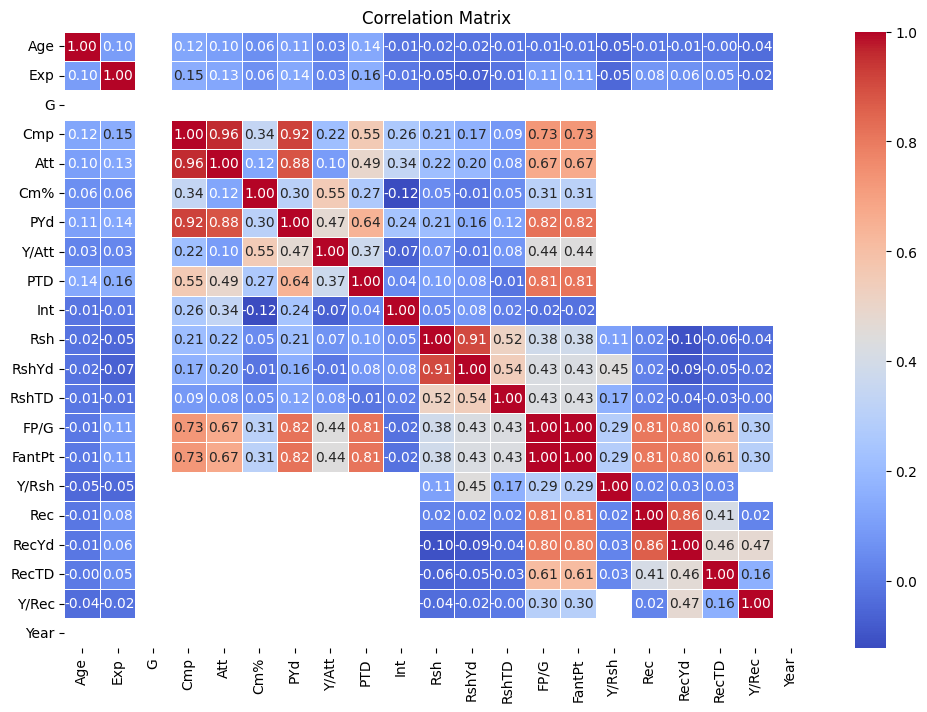

In [81]:
import pandas as pd

# Replace empty strings with NaN for the numeric columns
data_df.replace("", pd.NA, inplace=True)

# Convert columns to numeric if possible (non-convertible values will become NaN)
data_df[numeric_columns] = data_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Now compute the correlation matrix
correlation_matrix = data_df[numeric_columns].corr()

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### 3.0 Feature Engineering 

In [82]:
from sklearn.preprocessing import StandardScaler

# Apply Standard Scaler to numeric columns
scaler = StandardScaler()
data_df[numeric_columns] = scaler.fit_transform(data_df[numeric_columns])

# Check if scaling worked
print(data_df.head())

  Rank                Name       Age       Exp    G       Cmp       Att  \
0    1      Josh Allen BUF -0.092341 -0.516294  0.0  1.587088  1.313413   
1    2  Russell Wilson SEA  0.196776  1.371377  0.0  1.378878  0.534803   
2    3    Aaron Rodgers GB  0.377474  3.573659  0.0  1.482983  1.171847   
3    4   Lamar Jackson BAL -0.128481 -0.516294  0.0  0.233727 -0.173024   
4    5    Kyler Murray ARI -0.128481 -0.830905  0.0  0.858355  0.888717   

        Cm%       PYd     Y/Att  ...    FantPt  Position  Year  Week  \
0  0.543094  1.067518 -0.082121  ...  3.145998         1   NaN  2020   
1  1.730295  1.158477  0.862001  ...  3.095882         1   NaN  2020   
2  0.613342  1.540503  0.499177  ...  2.970591         1   NaN  2020   
3  1.126157  0.730971  1.564240  ...  2.557131         1   NaN  2020   
4  0.072428  0.321657 -0.483958  ...  2.406782         1   NaN  2020   

   Scoring profile  Y/Rsh  Rec  RecYd  RecTD  Y/Rec  
0                p    NaN  NaN    NaN    NaN    NaN  
1       

/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
